ЧИСЛОВОЙ РЯД. СХОДЯЩИЕСЯ И РАСХОДЯЩИЕСЯ РЯДЫ. СУММА РЯДА

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import sympy as sp 
from random import randint
from sympy import symbols, factorial

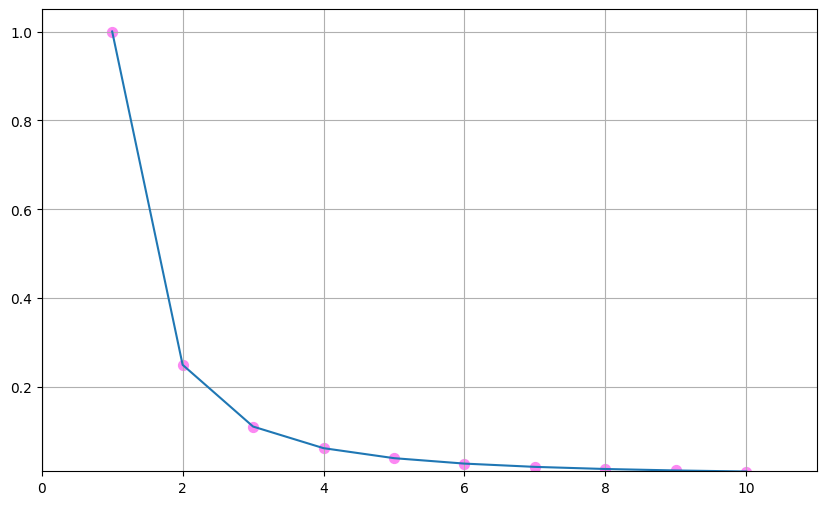

In [2]:
# УПРАЖНЕНИЕ 1
def plot_series_v1(F, N):
    n = np.arange(1,N + 1)
    plt.figure(figsize=(10,6))
    plt.plot(n, F(n))
    for number in n:
        plt.scatter(number, F(number), s=50, color="#fc88f3")
    plt.grid()
    plt.axis([0, N + 1, min((F(1)), F(N)) * 1.05, max((F(1)), F(N)) * 1.05])
    plt.axhline(y=0, color="k")
    plt.axvline(x=0, color="k")

def F(n):
    return 1/(n**2)

plot_series_v1(F, 10)

При q=0.9 сумма ряда равна: 9
Значит, ряд сходится при q = 0.9

При q=1 сумма ряда равна: oo
Значит, ряд расходится при q = 1

При q=2 сумма ряда равна: oo
Значит, ряд расходится при q = 2



C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10552\3352904450.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.axis([0, N + 1, min((F(1)), F(N)) * 1.05, max((F(1)), F(N)) * 1.05])


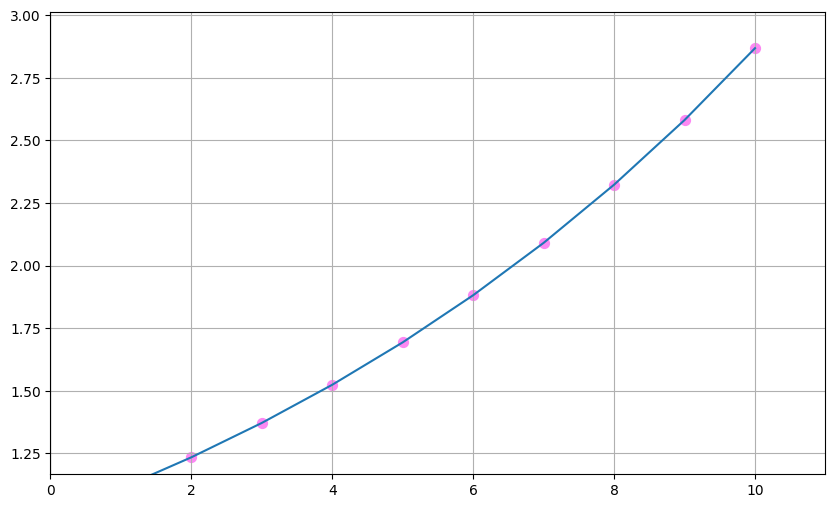

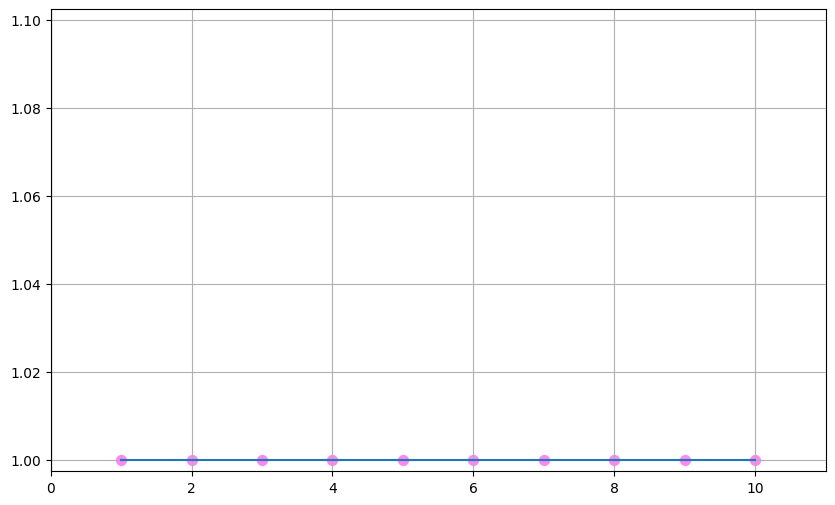

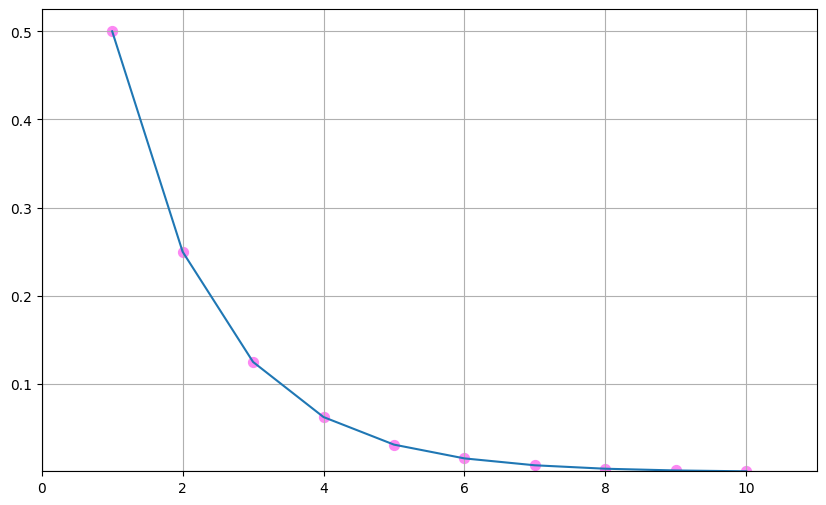

In [3]:
# УПРАЖНЕНИЕ 2 
# a) 
n = sp.symbols('n')
q_values = [0.9, 1, 2]

for q in q_values:
    result = sp.summation(q**n, (n, 1, sp.oo))
    print(f'При q={q} сумма ряда равна: {round(result)}')

    if abs(q) < 1:
        print(f'Значит, ряд сходится при q = {q}\n')
    else:
        print(f'Значит, ряд расходится при q = {q}\n')

# б)
for q in q_values:
    plot_series_v1(lambda x: 1/(q**x), 10)


(0.0, 21.0, 0.9, 8.0)

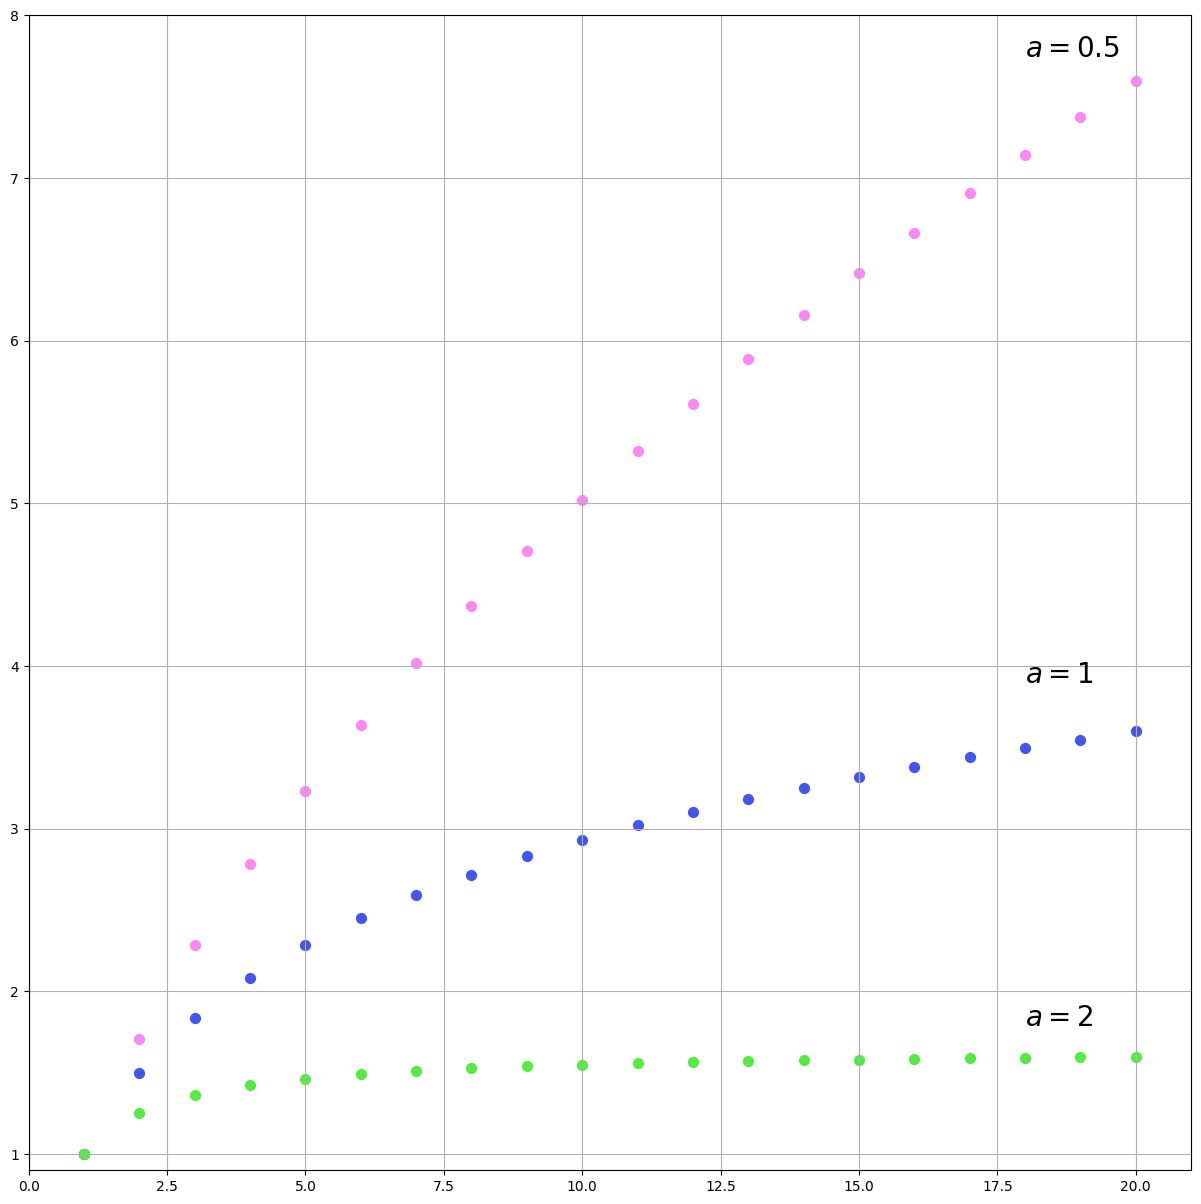

In [4]:
# УПРАЖНЕНИЕ 3
# a)
'''
 По определению ряд 1/n^a :
    0 < a <= 1 -> Расходится
    a > 1 -> Сходится

    РЯД ДИРИХЛЕ
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
    1) Необходимый признак выполнен для любого a > 0
    2) Перейдём к интегральному признаку Коши:
        Первообразные для a < 1:
            1 / (1 - a)  * x ^ (1 - a)
            1 - a > 0
            => 
            lim (x -> oo) [x ^ (1 - a)] = oo
            => 
!!!         РАСХОДИТСЯ
        Первообразная для a = 1:
            ln|x|
            lim (x -> oo) [ln|x|] = oo
            =>
!!!         РАСХОДИТСЯ 
        Первообразная для a > 1:
            1 / (1 - a)  * x ^ (1 - a)
            1 - a < 0
            => 
            lim (x -> oo) [x ^ (1 - a)] = 1 / oo = 0
            => 
!!!         СХОДИТСЯ
'''
# б) 
from functools import lru_cache
import sys
sys.setrecursionlimit(1000)

@lru_cache(None)
def summ(n, a):
    if n == 0: return 0
    return 1 / (n**a) + summ(n - 1, a)

def plot_series(Function, a, color_id):
    Array_of_outputs = [Function(i, a) for i in range(1,n + 1)]
    length = len(Array_of_outputs)
    for number in range(1, length + 1):
        plt.scatter(number, Array_of_outputs[number - 1], s=50, color=colors[color_id])

colors = ["#fc88f3", "#4455eb", "#55eb44"]
n = 20
plt.figure(figsize=(15,15))
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")

plot_series(summ, 0.5, 0)
plt.text(20 - 2, summ(20 - 2, 0.5) + 0.6, "$a = 0.5$", fontsize=20)

plot_series(summ, 1, 1)
plt.text(20 - 2, summ(20 - 2, 1) + 0.4, "$a = 1$", fontsize=20)

plot_series(summ, 2, 2)
plt.text(20 - 2, summ(20 - 2, 2) + 0.2, "$a = 2$", fontsize=20)

plt.axis([0, n+1, 0.9, 8])
# ///////////////////////////////////////////////////////////


НЕОБХОДИМЫЙ ПРИЗНАК СХОДИМОСТИ

УПРАЖНЕНИЕ 4

|Ряд|Чему равен $lim (n -> oo) (a_n)$ ?| Ряд сходится |
|---|----------------------------------|--------------|
|$1/n$            |0| x |
|$1/n^2$          |0| x |
|$1/(nln(n))$     |0| x |
|$ln(n)/cbrt(n^2)$|0| x |
|n / (n^2 + 2)    |0| x |

In [5]:
@lru_cache(None)
def sum_n(n):
    if n == 0: return 0
    return 1 / (n) + sum_n(n - 1)

@lru_cache(None)
def sum_ns(n):
    if n == 0: return 0
    return 1 / (n**2) + sum_ns(n - 1)

@lru_cache(None)
def n_ln(n):
    if n == 1: return 0
    return 1 / (n*np.log(n)) + n_ln(n - 1)

@lru_cache(None)
def ln_cbrt(n):
    if n == 0: return 0
    return np.log(n) / (np.cbrt(n**2)) + ln_cbrt(n - 1)

@lru_cache(None)
def n_nsqr(n):
    if n == 0: return 0
    return n / (n**2 + 2) + n_nsqr(n - 1)

In [6]:
n = 20
def plot_series(Function, legend = False, partial_sums = True, elements = False, series_label=''):
    colors = [ str('#' + hex(randint(5,15))[2:] + hex(randint(0,15))[2:]
                       + hex(randint(0,15))[2:] + hex(randint(0,15))[2:]
                       + hex(randint(0,15))[2:] + hex(randint(0,15))[2:]) for i in range(2)]
    Array_of_sums = [Function(i) for i in range(1,n + 1)]
    Array_of_elements = [Function(1)]
    if (elements):
        for i in range(1,n):
            Array_of_elements.append(Array_of_sums[i] - Array_of_sums[i - 1]) # [Array_of_sums[i] - Array_of_sums[i - 1] for i in range(1,n)]
    for number in range(1, len(Array_of_sums) + 1):
        if (partial_sums):
            plt.scatter(number, Array_of_sums[number - 1], s=50, color=colors[0])
        if (elements):
            plt.scatter(number, Array_of_elements[number - 1], s=50, color=colors[1])
    if (partial_sums or elements):
        plt.grid()
        plt.axhline(y=0, color="k")
        plt.axvline(x=0, color="k")
        plt.axis([0, n+1, -0.4, Array_of_sums[n - 1] * 1.2])
    if (legend):
        if (partial_sums):
            plt.scatter(-10, -10, s=50, color=colors[0], label="Sum  " + series_label)
        if (elements):
            plt.scatter(-10, -10, s=50, color=colors[1], label="Elements  " + series_label)
        plt.legend(loc = 'upper left', borderaxespad=0.0, shadow=True)
        plt.tight_layout()


C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10552\1232290718.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(3, 2.5297179620359764, '$n/(n^2 + 2)$')

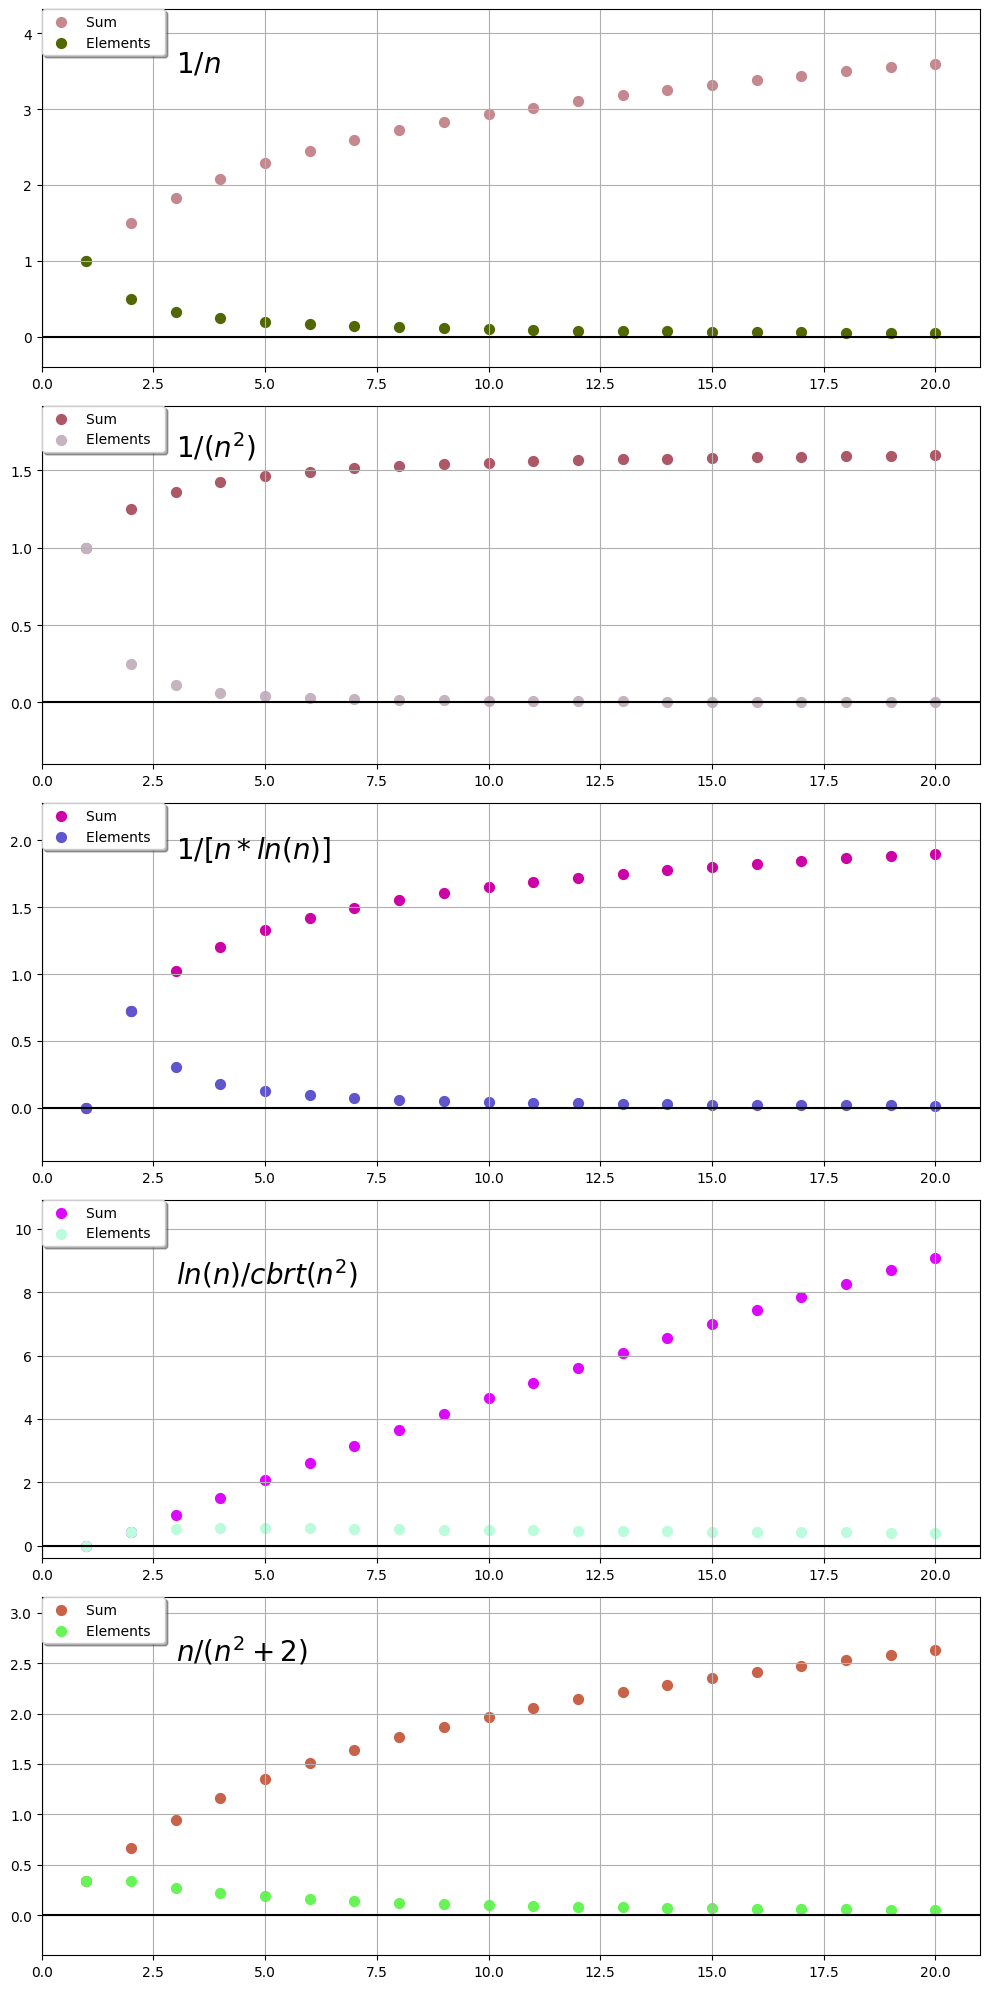

In [7]:
plt.figure(figsize=(10,20))

plt.subplot(5,1,1)
plot_series(sum_n, elements=True, legend=True)
plt.text(3, sum_n(20 - 2), "$1/n$", fontsize=20)

plt.subplot(5,1,2)
plot_series(sum_ns, elements=True, legend=True)
plt.text(3, sum_ns(20 - 2), "$1/(n^2)$", fontsize=20)

plt.subplot(5,1,3)
plot_series(n_ln, elements=True, legend=True)
plt.text(3, n_ln(20 - 2), "$1/[n*ln(n)]$", fontsize=20)

plt.subplot(5,1,4)
plot_series(ln_cbrt, elements=True, legend=True)
plt.text(3, ln_cbrt(20 - 2), "$ln(n)/cbrt(n^2)$", fontsize=20)

plt.subplot(5,1,5)
plot_series(n_nsqr, elements=True, legend=True)
plt.text(3, n_nsqr(20 - 2), "$n/(n^2 + 2)$", fontsize=20)

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10552\1939336036.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


(0.0, 21.0, 0.0, 12.192994682433516)

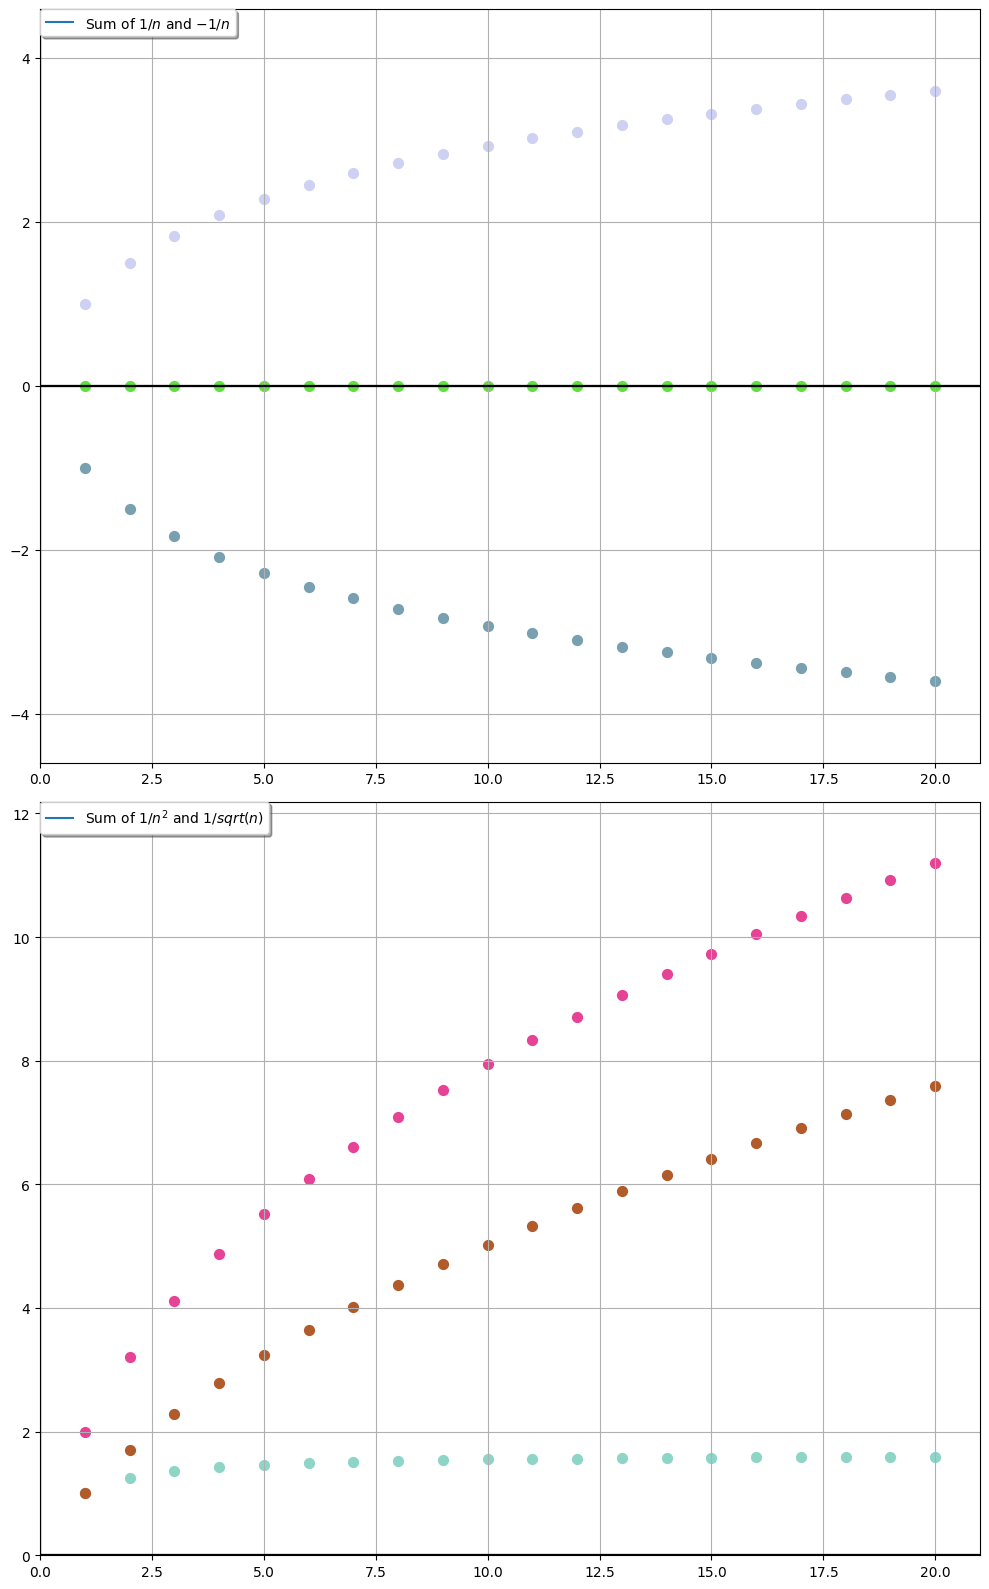

In [8]:
# УПРАЖНЕНИЕ 5
'''
    ПАМЯТКА:
    Если ряд sum(a_n) и sum(b_n) - сходятся, а их суммы равны A и B,
    то сходится ряд sum(a_n + b_n), причем его сумма равна A + B

    
# a)
    ! Если ряды sum(a_n) и sum(b_n) - расходятся
      Причем оба знакопостоянные И имеют один знак, 
      то ряд sum(a_n + b_n) - точно расходится                    '''

@lru_cache(None)
def sum_n_negative(n):
    if n == 0: return 0
    return -1 / (n) + sum_n_negative(n - 1)
@lru_cache(None)
def sum_sqrt_n(n):
    if n == 0: return 0
    return 1 / np.sqrt(n) + sum_sqrt_n(n - 1)
@lru_cache(None)
def both_functions(n):
    if n == 0: return 0
    return 1 / np.sqrt(n) + 1 /(n) + both_functions(n - 1)

plt.figure(figsize=(10, 16))

plt.subplot(2,1,1)
plot_series(sum_n)
plot_series(sum_n_negative)
plot_series(lambda x: x*0)
plt.plot(-1,-1, label = "Sum of $1/n$ and $-1/n$")
plt.legend(loc = 'upper left', borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([0, n+1, sum_n_negative(n) - 1, sum_n(n) + 1])
'''
# б)
    ! Если ряды sum(a_n) и sum(b_n) - разные по сходимости
      то ряд sum(a_n + b_n) - точно расходится                    '''

plt.subplot(2,1,2)
plot_series(sum_ns)
plot_series(sum_sqrt_n)
plot_series(both_functions)
plt.plot(-1,-1, label = "Sum of $1/n^2$ and $1/sqrt(n)$")
plt.legend(loc = 'upper left', borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([0, n+1, 0, both_functions(n) + 1])

4. Признак сравнение сходимости рядов с положительными членами

In [9]:
# УПРАЖНЕНИЕ 6
@lru_cache(None)
def ex6_1(n):
    if n == 0: return 0
    return 1/(n * np.sqrt(n + 1) * np.sqrt(n + 2)) + ex6_1(n - 1)

@lru_cache(None)
def ex6_2(n):
    if n == 0: return 0
    return (2 + np.sin(n)) / (np.sqrt(n)) + ex6_2(n - 1)

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10552\1232290718.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


(1.0, 21.0, 0.0, 3.0)

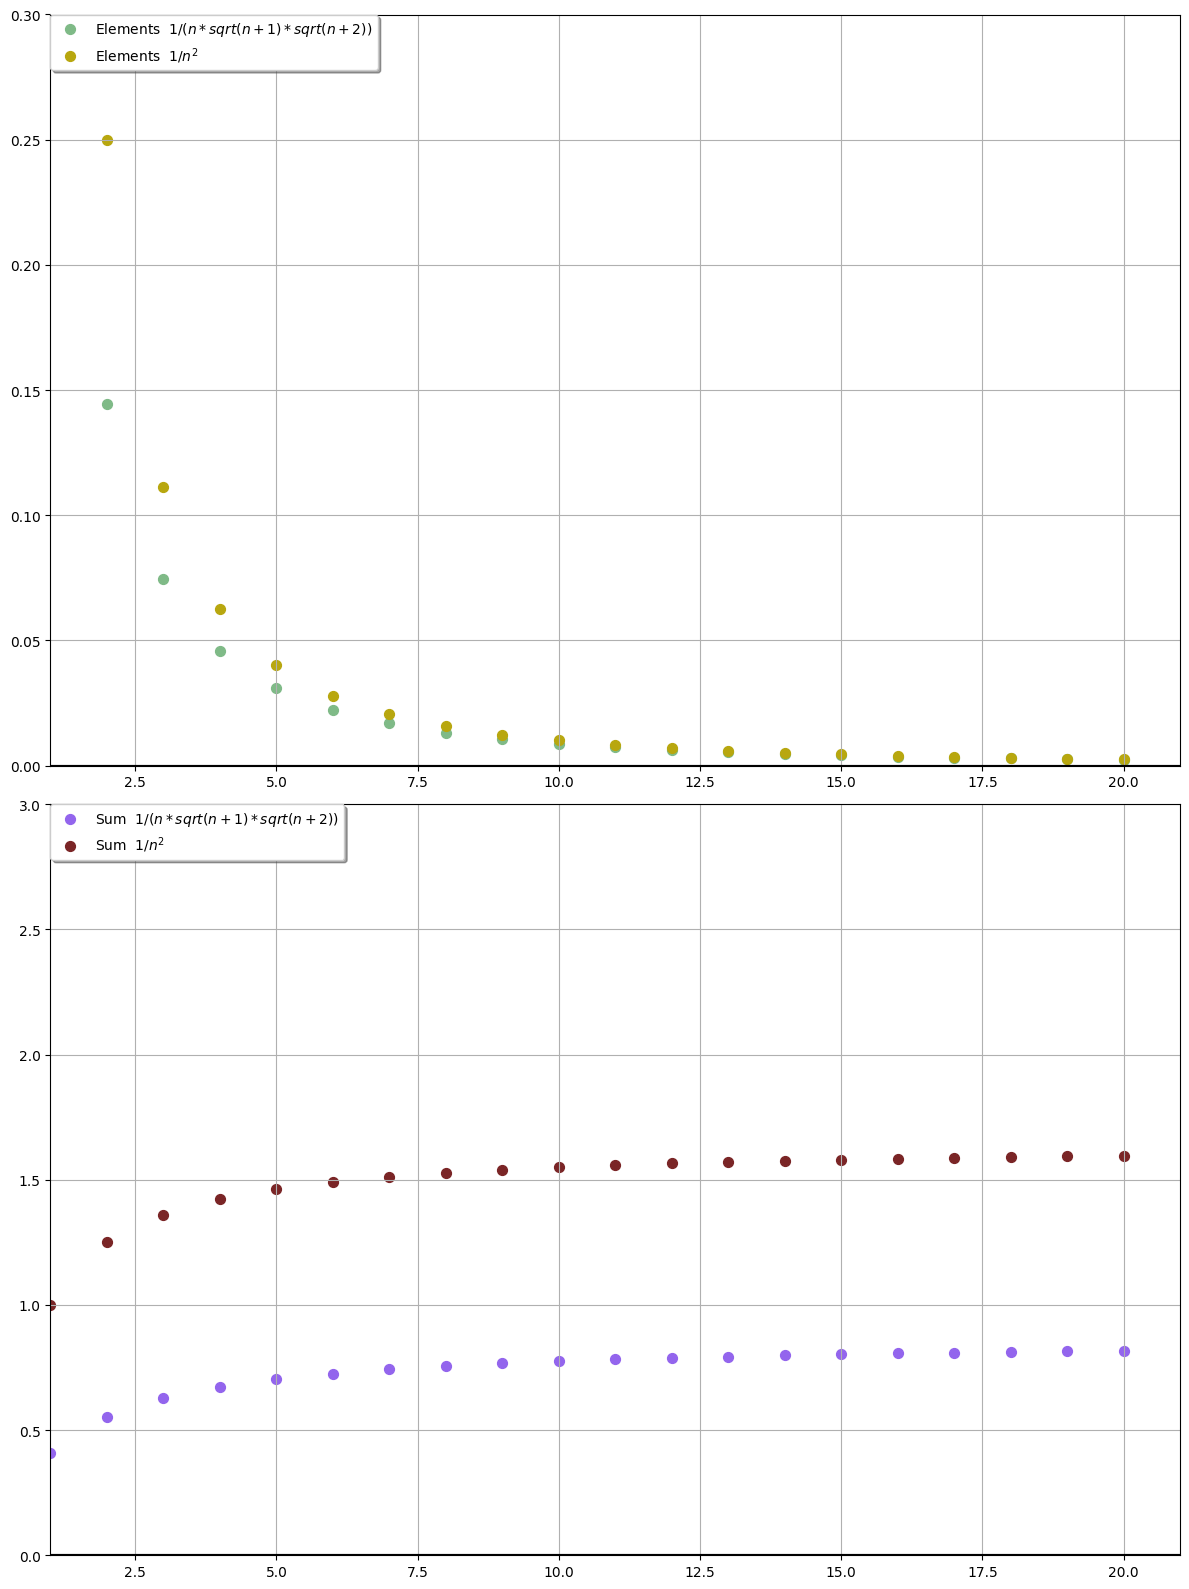

In [10]:
# (1)
plt.figure(figsize=(12, 16))
plt.subplot(2,1,1)
plot_series(ex6_1,  partial_sums=False, elements=True, legend=True, series_label="$1/(n * sqrt(n+1) * sqrt(n+2))$")
plot_series(sum_ns, partial_sums=False, elements=True, legend=True, series_label="$1/n^2$")
plt.grid(True)
plt.axis([1, 20 + 1, 0, 0.3])
plt.subplot(2,1,2)
plot_series(ex6_1,  partial_sums=True, elements=False, legend=True, series_label="$1/(n * sqrt(n+1) * sqrt(n+2))$")
plot_series(sum_ns, partial_sums=True, elements=False, legend=True, series_label="$1/n^2$")
plt.grid(True)
plt.axis([1, 20 + 1, 0, 3])

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10552\1232290718.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


(1.0, 21.0, 0.0, 23.7857650758695)

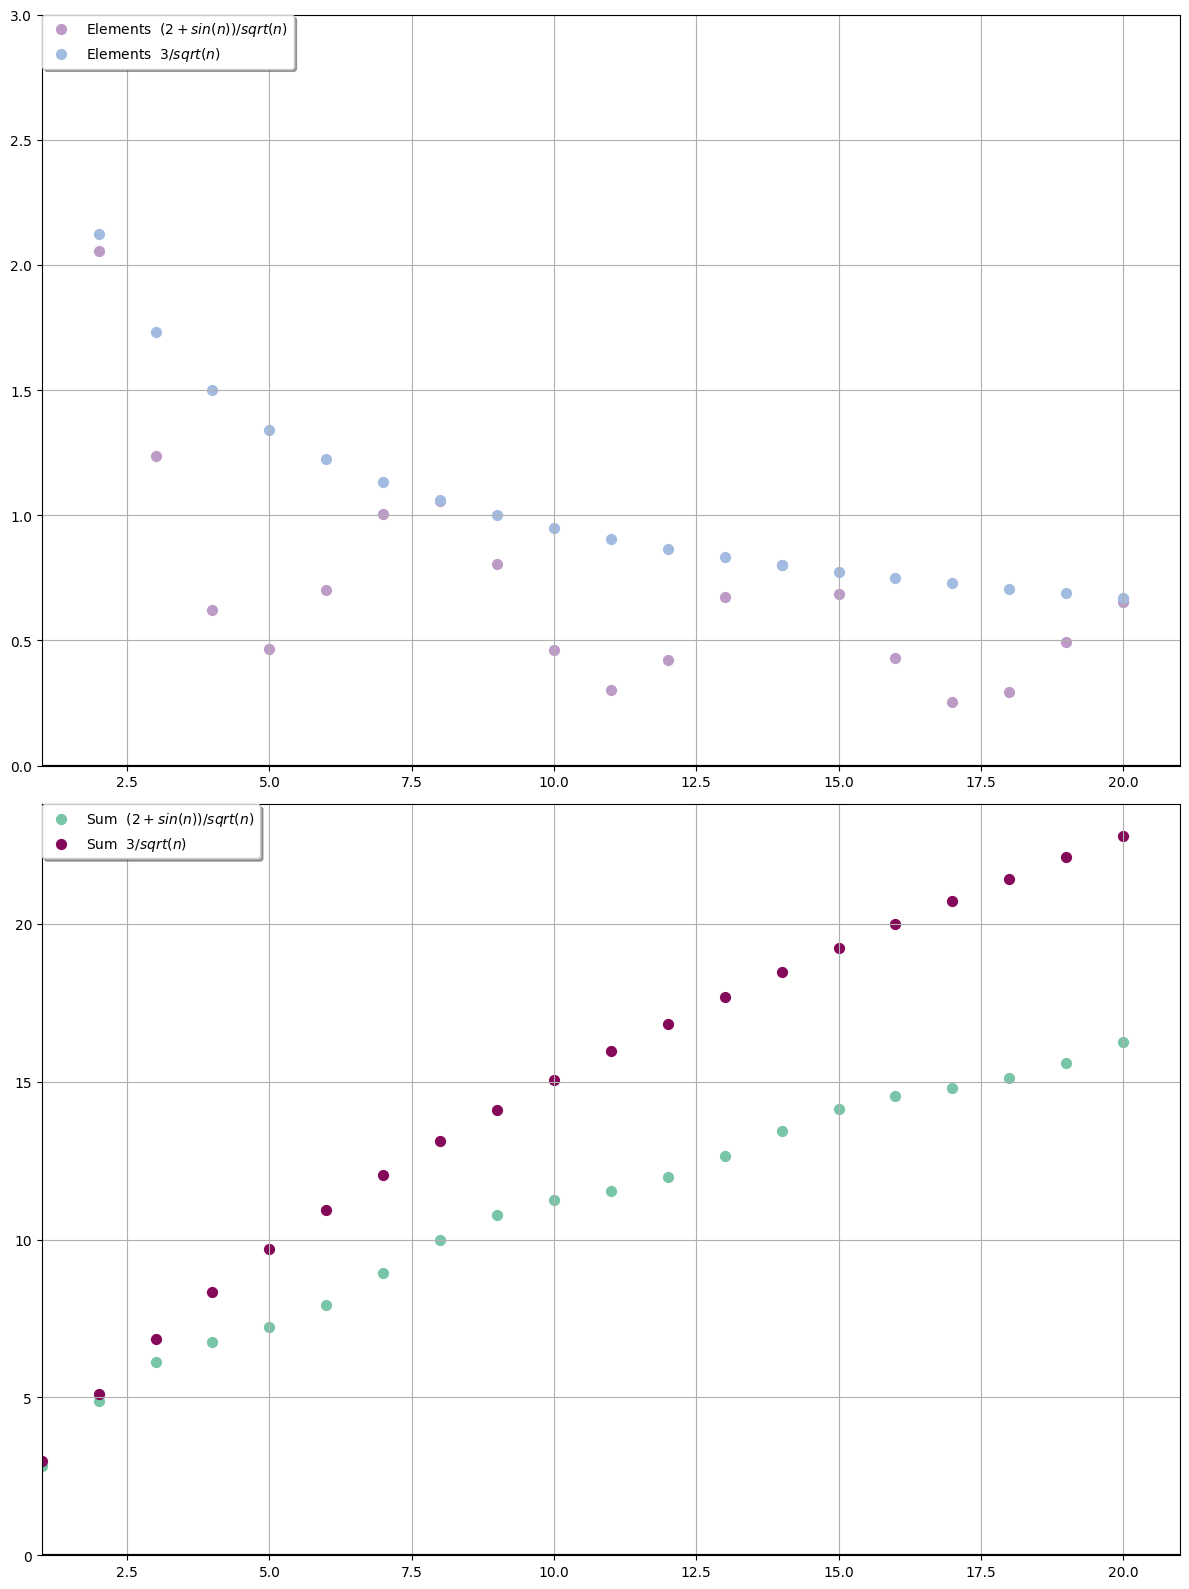

In [11]:
# (2)
plt.figure(figsize=(12, 16))
plt.subplot(2,1,1)
plot_series(ex6_2,                     partial_sums=False, elements=True, legend=True, series_label="$(2 + sin(n))/sqrt(n)$")
plot_series(lambda x: 3*sum_sqrt_n(x), partial_sums=False, elements=True, legend=True, series_label="$3/sqrt(n)$")
plt.grid(True)
plt.axis([1, 20 + 1, 0, 3])
plt.subplot(2,1,2)
plot_series(ex6_2,                     partial_sums=True, elements=False, legend=True, series_label="$(2 + sin(n))/sqrt(n)$")
plot_series(lambda x: 3*sum_sqrt_n(x), partial_sums=True, elements=False, legend=True, series_label="$3/sqrt(n)$")
plt.grid(True)
plt.axis([1, 20 + 1, 0, 3*sum_sqrt_n(20) + 1])

5. Нахождение с заданной точностью суммы ряда с положительными членами

In [12]:
'''
    УТВЕРЖДЕНИЕ ОБ ОЦЕНКЕ ОСТАТКА РЯДА

    Если существует q < 1 : Для всех n > n_0 => 
    =>
    a_n+1 / a_n  <= q
    Тогда сумма R_k k-го остатка при k >= n_0:

    R_k <= a_k+1 / ( 1 - q )

    ! ДЛЯ ЛЮБОГО m :
        a_k+m <= a_k * q^m

        =>
        S_p = a_k+1   + ... + a_k+p
        T_p = a_k * q + ... + a_k * q^p
        S_p <= T_p

        И !

        lim(p->oo) (S_p)   <=   lim(p->oo) (T_p)
        Причем lim(p->oo) (S_p) = R_k
'''

'\n    УТВЕРЖДЕНИЕ ОБ ОЦЕНКЕ ОСТАТКА РЯДА\n\n    Если существует q < 1 : Для всех n > n_0 => \n    =>\n    a_n+1 / a_n  <= q\n    Тогда сумма R_k k-го остатка при k >= n_0:\n\n    R_k <= a_k+1 / ( 1 - q )\n\n    ! ДЛЯ ЛЮБОГО m :\n        a_k+m <= a_k * q^m\n\n        =>\n        S_p = a_k+1   + ... + a_k+p\n        T_p = a_k * q + ... + a_k * q^p\n        S_p <= T_p\n\n        И !\n\n        lim(p->oo) (S_p)   <=   lim(p->oo) (T_p)\n        Причем lim(p->oo) (S_p) = R_k\n'

In [19]:
# УПРАЖНЕНИЕ 7
from sympy import symbols, evalf
'''
def estimate(Expression, epsilon = 1, start_value = 1):
    n = symbols("n")
    i = start_value - 1
    while (True):
        i += 1
        q = Expression.subs(n, i + 1) / Expression.subs(n, i)
        if (q < 1):
            R_k = Expression.subs(n, i) / (1 - q)
            if (R_k < epsilon):
                return f"R_k <= {R_k}", f"n_0 = {i})" + " | " + f"(For all k >= {i} Sum of a_k <= epsilon = {epsilon}"
'''
def sum_of_series(Expression, epsilon = 1, start_value = 1):
    n = symbols("n")
    i = start_value - 1
    while (True):
        i += 1
        q = Expression.subs(n, i + 1) / Expression.subs(n, i)
        if (q < 1):
            R_k = Expression.subs(n, i) / (1 - q)
            if (R_k < epsilon):
                break
    summa = 0
    for j in range(start_value, i + 1):
        summa += Expression.subs(n, j)
    print(f"Sum [{start_value} -> {i}] = {summa} or {summa.evalf()}\nR_k <= {R_k} or {R_k.evalf()}\n\nn_0 = {i} \nFor all k >= {i} Sum of a_k <= epsilon = {epsilon}\n------------\n")
    return (summa, summa.evalf(), R_k, R_k.evalf())

n = symbols("n")
sum_of_series(1/n**2, epsilon = 0.5)

# Начиная с k = n_0 сумма остатка < epsilon

Sum [1 -> 2] = 5/4 or 1.25000000000000
R_k <= 9/20 or 0.450000000000000

n_0 = 2 
For all k >= 2 Sum of a_k <= epsilon = 0.5
------------



(5/4, 1.25000000000000, 9/20, 0.450000000000000)

In [20]:
# УПРАЖНЕНИЕ 8
# ВАРИАНТ 4
# Sum (2^n / n!)
from sympy import factorial
n = symbols("n")
series = 2**n/factorial(n)
#print(estimate(series, epsilon = 0.001))
sum_of_series(series, epsilon = .001)

'''
NOTE !!!
 ОШИБКА В МЕТОДИЧКЕ
 РЯД - ЧАСТНЫЙ СЛУЧАЙ РАЗЛОЖЕНИЯ e^x 
 КОНКРЕТНЕЕ: e^2 - 1 ~ 6.389056098930650227230427460575
'''

Sum [1 -> 10] = 30188/4725 or 6.38899470899471
R_k <= 44/127575 or 0.000344895159709975

n_0 = 10 
For all k >= 10 Sum of a_k <= epsilon = 0.001
------------



'\nNOTE !!!\n ОШИБКА В МЕТОДИЧКЕ\n РЯД - ЧАСТНЫЙ СЛУЧАЙ РАЗЛОЖЕНИЯ e^x \n КОНКРЕТНЕЕ: e^2 - 1 ~ 6.389056098930650227230427460575\n'

<img src="../img_save/img_calc_lab3.png" width="500" align="center"> 

In [15]:
'''
# TEST CASE 1
n = symbols("n")
series = n**2 / 3**n
print(estimate(series, epsilon = .001))
print(sum_of_series(series, epsilon = .001), " ~ ", sum_of_series(series, epsilon = .001).evalf())
# sum_(n=11)^∞ n^2/3^n = 133/118098 ≈ 0.0011262
# sum_(n=12)^∞ n^2/3^n = 157/354294 ≈ 0.00044313
# sum_(n= 1)^∞ n^2/3^n = 3/2 = 1.5
# WOLFRAMALPHA

# TEST CASE 2
#series = ((1 + 1/n)**(n**2)) / 3**n
series = 2 / (4*n**2 - 9)
print(estimate(series, epsilon = .001, start_value = 3))
print(sum_of_series(series, epsilon = .001, start_value = 3), " ~ ", sum_of_series(series, epsilon = .001, start_value = 3).evalf())
print()
print(estimate(series, epsilon = .0005, start_value = 3))
print(sum_of_series(series, epsilon = .0005, start_value = 3), " ~ ", sum_of_series(series, epsilon = .0005, start_value = 3).evalf())
# 0.2234166066707754887889616456524225447623369308793700751171463833... WFA 3-252
# sum_(n=500)^∞ 2/(4 n^2 - 9) = 2993999/2990997009 ≈ 0.001001
# sum_(n=501)^∞ 2/(4 n^2 - 9) = 3005999/3008996991 ≈ 0.000999
# sum_(n=3)^∞ 2/(4 n^2 - 9) = 71/315 ≈ 0.2254
'''

'\n# TEST CASE 1\nn = symbols("n")\nseries = n**2 / 3**n\nprint(estimate(series, epsilon = .001))\nprint(sum_of_series(series, epsilon = .001), " ~ ", sum_of_series(series, epsilon = .001).evalf())\n# sum_(n=11)^∞ n^2/3^n = 133/118098 ≈ 0.0011262\n# sum_(n=12)^∞ n^2/3^n = 157/354294 ≈ 0.00044313\n# sum_(n= 1)^∞ n^2/3^n = 3/2 = 1.5\n# WOLFRAMALPHA\n\n# TEST CASE 2\n#series = ((1 + 1/n)**(n**2)) / 3**n\nseries = 2 / (4*n**2 - 9)\nprint(estimate(series, epsilon = .001, start_value = 3))\nprint(sum_of_series(series, epsilon = .001, start_value = 3), " ~ ", sum_of_series(series, epsilon = .001, start_value = 3).evalf())\nprint()\nprint(estimate(series, epsilon = .0005, start_value = 3))\nprint(sum_of_series(series, epsilon = .0005, start_value = 3), " ~ ", sum_of_series(series, epsilon = .0005, start_value = 3).evalf())\n# 0.2234166066707754887889616456524225447623369308793700751171463833... WFA 3-252\n# sum_(n=500)^∞ 2/(4 n^2 - 9) = 2993999/2990997009 ≈ 0.001001\n# sum_(n=501)^∞ 2/(4 n^2 -

6. Знакочередующиеся ряды

In [21]:
# УПРАЖНЕНИЕ 9

def sum_of_alt_series(Expression, epsilon = 1, start_value = 1):
    n = symbols("n")
    i = start_value - 1
    summa = 0
    summ_over = Expression.subs(n, 1).evalf()
    last_remainder = 0
    number_of_elements = 0
    remainders = []
    while (True):
        i += 1
        summa += Expression.subs(n, i).evalf()
        summ_over += Expression.subs(n, i + 1).evalf()
        #print(i, "{:.4f}".format(summ), "{:.4f}".format(summ_over)) # FOR DEBUGGING PURPOSES
        remainders.append( [i, np.abs(summa) / epsilon // 1])
        if ( np.abs(summ_over / epsilon // 1)  == np.abs(summa / epsilon // 1)):
            last_remainder = np.abs(summa) / epsilon // 1; break
    for remainder in remainders:
        if (remainder[1] == last_remainder):
            number_of_elements = remainder[0]
            break
    #return f"Sum [{start_value} -> {number_of_elements}] = {sum(Expression.subs(n, i).evalf() for i in range(1, number_of_elements + 1))} \nn_0 = {number_of_elements} \nFor all k >= {number_of_elements} Sum of a_k <= epsilon = {epsilon}\n--------\n"
    return (number_of_elements, sum(Expression.subs(n, i).evalf() for i in range(1, number_of_elements + 1)))

n = symbols("n")
#print(sum_of_alt_series(1/n**2, epsilon = 0.5))
#print(sum_of_alt_series( ((-1)**(n + 1)) * (1 / n**2), epsilon = .01 ))

#print(sum_of_alt_series( ((-1)**(n + 1)) * (1 / n), epsilon = .001 ))
eps = .001
NOE, sr = sum_of_alt_series( ((-1)**(n + 1)) * (1 / n), epsilon = eps )
print(f"Sum [{1} -> {NOE}] = {sr} \nn_0 = {NOE} \nFor all k >= {NOE} Sum of a_k <= epsilon = {eps}\n--------\n")

Sum [1 -> 587] = 0.693998243773302 
n_0 = 587 
For all k >= 587 Sum of a_k <= epsilon = 0.001
--------



In [22]:
# УПРАЖНЕНИЕ 10

n = symbols('n')
#print(sum_of_alt_series( ((-1)**n) * ((3**n) / (factorial(n))), epsilon = .001 ))
eps = .001
NOE, sr = sum_of_alt_series( ((-1)**n) * ((3**n) / (factorial(n))), epsilon = eps )
print(f"Sum [{1} -> {NOE}] = {sr} \nn_0 = {NOE} \nFor all k >= {NOE} Sum of a_k <= epsilon = {eps}\n--------\n")

Sum [1 -> 12] = -0.950002536525974 
n_0 = 12 
For all k >= 12 Sum of a_k <= epsilon = 0.001
--------



In [18]:
# КОНТРОЛЬНЫЕ ВОПРОСЫ
'''
1) Ряды расходятся:
        1-ый - подобен ряду дирихле (предельный признак сравнения)
               Так как альфа <= 1, то ряд расходится
               ИЛИ
               Ряд эквивалентен гармоническому ряду (тоже ряд дирихле, при а = 1)
               => РАСХОДИТСЯ
        2-ой - Бесконечная последовательность из членов: [1, 0, -1, 0]
               Не имеет конечного предела, т.е не выпоолняется необходимый признак сходимости
               => РАСХОДИТСЯ
               
2) Полученный ряд можно полуить если начать исходый от n=3, т.е. откинув конечное число членов ряда => на сходимость не влияет
   Тогда Сумма ряда станет равна:
            pi/ 4 - 1/1 + 1/3 ~ 0.1187314967307816429489917915321...

3) Выходит, что от суммы ряда отняли бесконечное число 1, то есть -оо
    Т.Е. "новый" ряд - РАСХОДИТСЯ
'''

'\n1) Ряды расходятся:\n        1-ый - подобен ряду дирихле (предельный признак сравнения)\n               Так как альфа <= 1, то ряд расходится\n               ИЛИ\n               Ряд эквивалентен гармоническому ряду (тоже ряд дирихле, при а = 1)\n               => РАСХОДИТСЯ\n        2-ой - Бесконечная последовательность из членов: [1, 0, -1, 0]\n               Не имеет конечного предела, т.е не выпоолняется необходимый признак сходимости\n               => РАСХОДИТСЯ\n               \n2) Полученный ряд можно полуить если начать исходый от n=3, т.е. откинув конечное число членов ряда => на сходимость не влияет\n   Тогда Сумма ряда станет равна:\n            pi/ 4 - 1/1 + 1/3 ~ 0.1187314967307816429489917915321...\n\n3) Выходит, что от суммы ряда отняли бесконечное число 1, то есть -оо\n    Т.Е. "новый" ряд - РАСХОДИТСЯ\n'